<a href="https://colab.research.google.com/github/Abhijeet141022/Quantum-Optimizing-Molecular-Structures-/blob/main/Rydberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Register Definition:

(i) Define the spatial configuration of the atoms.


(ii) Visualize the register to ensure the atom positions are correct.
## 2. Pulse Definition:

(i) Define the pulses to be applied to the atoms.


(ii) Visualize the pulse shapes to ensure they are as expected.
## 3. Sequence Creation:

(i) Create a sequence of operations (pulses) to be applied to the atoms.


(ii) Visualize the sequence to ensure that the operations are correctly defined.
## 4. Simulation Setup:

(i) Use the QutipEmulator to simulate the sequence.


(ii) Define the observable to measure specific properties of the system.
## 5. Plotting:

Visualize the results of the simulation.

In [ ]:
pip install pulser

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pulser
from pulser_simulation import QutipEmulator

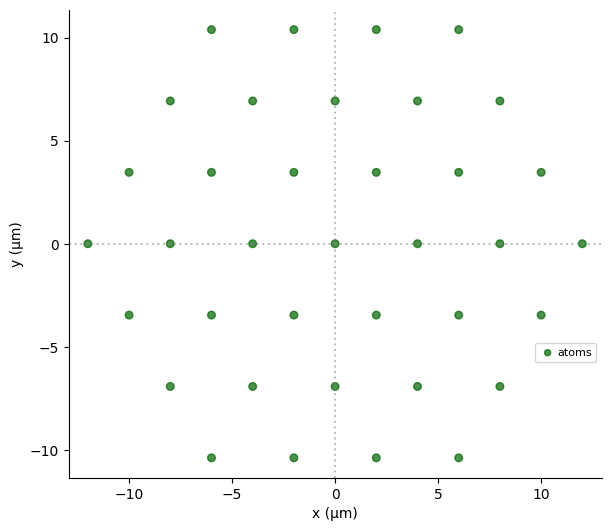

In [ ]:
layers = 3
reg = pulser.Register.hexagon(layers, prefix="q")
reg.draw(with_labels=False)

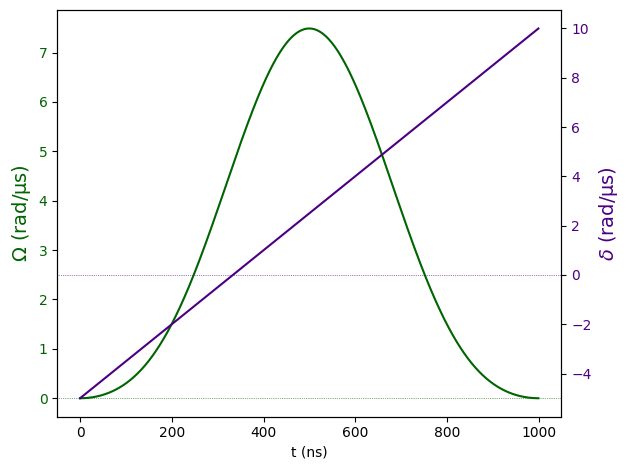

In [ ]:
duration = 1000  # Typical: ~1 µsec
pulse = pulser.Pulse(
    amplitude=pulser.BlackmanWaveform(duration, np.pi),
    detuning=pulser.RampWaveform(duration, -5.0, 10.0),
    phase=0,
)
pulse.draw()

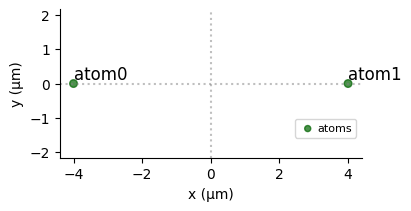

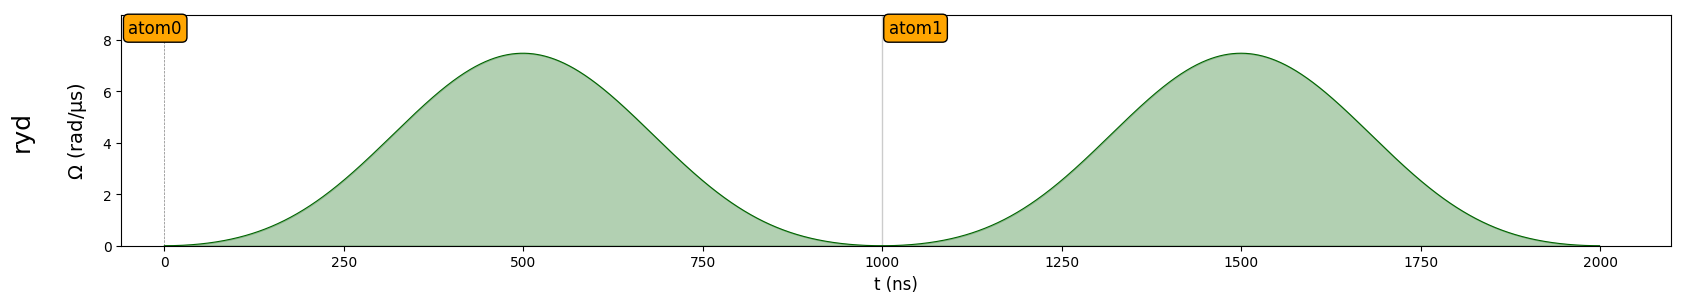

In [ ]:
reg = pulser.Register.rectangle(1, 2, spacing=8, prefix="atom")
reg.draw()

pi_pulse = pulser.Pulse.ConstantDetuning(
    pulser.BlackmanWaveform(duration, np.pi), 0.0, 0.0
)

seq = pulser.Sequence(reg, pulser.DigitalAnalogDevice)

seq.declare_channel("ryd", "rydberg_local", "atom0")

seq.add(pi_pulse, "ryd")
seq.target("atom1", "ryd")
seq.add(pi_pulse, "ryd")

seq.draw()

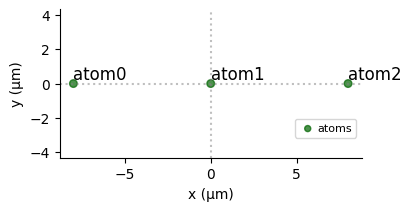

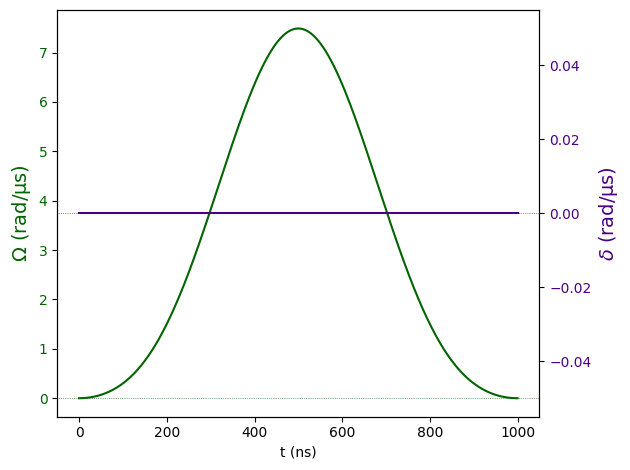

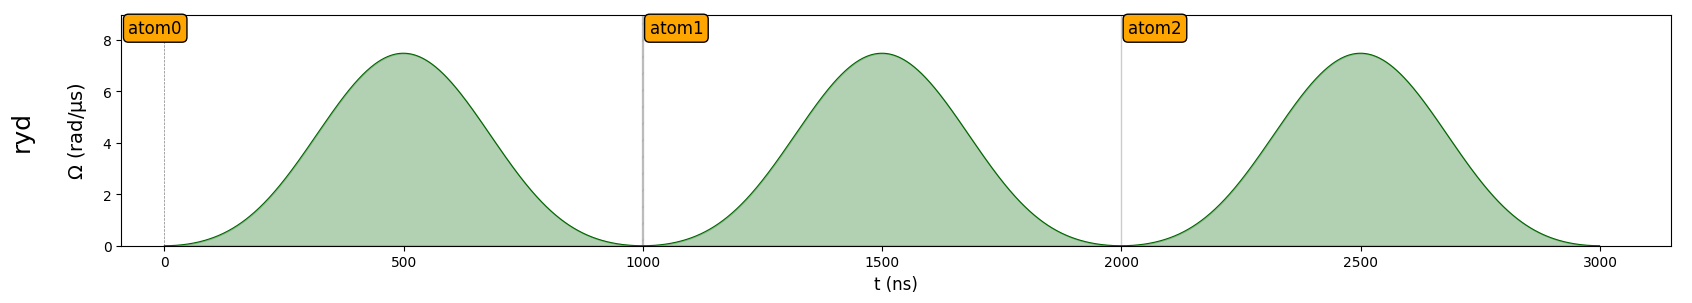

In [ ]:
import pulser
import matplotlib.pyplot as plt
from pulser import Register, Sequence
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import BlackmanWaveform
from pulser.pulse import Pulse

# Define the register with 3 atoms in a straight line with a spacing of 8
reg = Register.rectangle(1, 3, spacing=8, prefix="atom")
reg.draw()

# Define the pi pulse using a Blackman waveform
duration = 1000  # Duration in ns
pi_pulse = Pulse.ConstantDetuning(
    BlackmanWaveform(duration, np.pi), 0.0, 0.0
)
pi_pulse.draw()

# Create a sequence with the defined register and device
seq = Sequence(reg, DigitalAnalogDevice)

# Declare the channel for the Rydberg interaction
seq.declare_channel("ryd", "rydberg_local", "atom0")

# Add the pi pulse to the sequence for the first atom
seq.add(pi_pulse, "ryd")

# Target and add the pi pulse to the second atom
seq.target("atom1", "ryd")
seq.add(pi_pulse, "ryd")

# Target and add the pi pulse to the third atom
seq.target("atom2", "ryd")
seq.add(pi_pulse, "ryd")

# Draw the sequence
seq.draw()

...Simulation Complete!


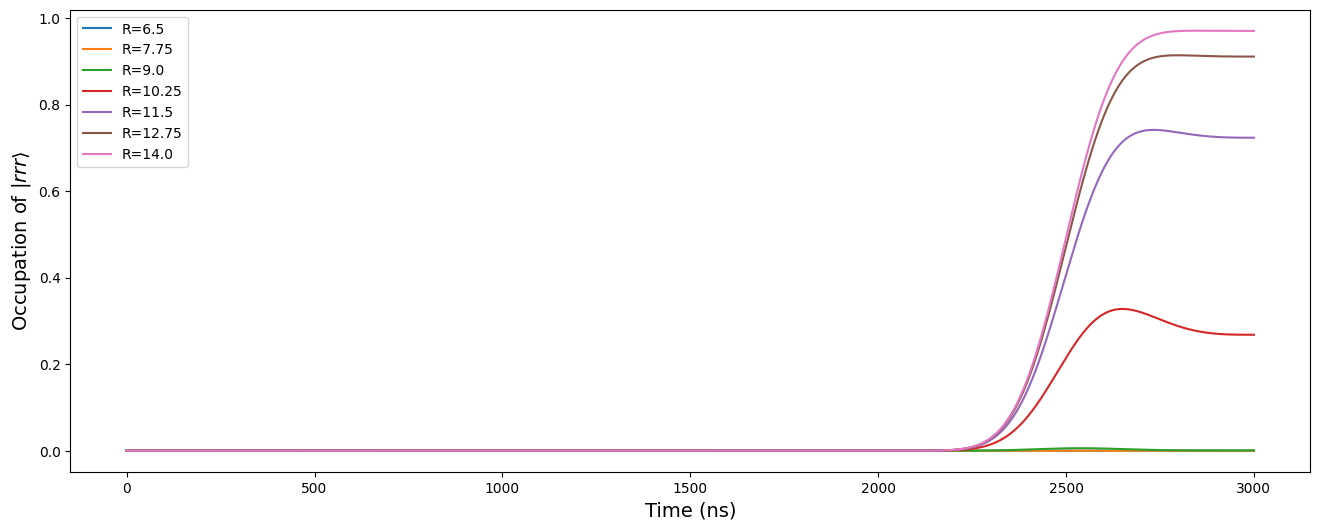

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pulser
from pulser import Register, Sequence
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import BlackmanWaveform
from pulser.pulse import Pulse
from pulser_simulation import QutipEmulator

# Define the pi pulse using a Blackman waveform
duration = 1000  # Duration in ns
pi_pulse = Pulse.ConstantDetuning(
    BlackmanWaveform(duration, np.pi), 0.0, 0.0
)

data = []
distances = np.linspace(6.5, 14, 7)

# Define the state |r> for one atom
r = [1, 0]  # |r>
# Define the state |rrr> for three atoms
rrr = np.kron(np.kron(r, r), r)  # |rrr>
# Define the outer product of |rrr> with its conjugate transpose
occup = [np.outer(rrr, np.conj(rrr))]  # |rrr><rrr|

for R in distances:
    # Atom Register and Device
    reg = Register.rectangle(1, 3, spacing=R, prefix="atom")

    # Pulse Sequence
    seq = Sequence(reg, DigitalAnalogDevice)
    seq.declare_channel("ryd", "rydberg_local", "atom0")
    seq.add(pi_pulse, "ryd")
    seq.target("atom1", "ryd")
    seq.add(pi_pulse, "ryd")
    seq.target("atom2", "ryd")
    seq.add(pi_pulse, "ryd")

    # Create a QutipEmulator instance
    sim = QutipEmulator.from_sequence(seq)

    res = sim.run()  # Returns a SimulationResults instance
    data.append(
        res.expect(occup)[0]
    )  # Get expectation value for the occupation operator

print("...Simulation Complete!")

plt.figure(figsize=[16, 6])
for i, R in enumerate(distances):
    plt.plot(data[i], label=f"R={R}")
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel(r"Occupation of $|rrr\rangle$", fontsize=14)
plt.legend()
plt.show()